In [1]:
!pip install snapml

In [2]:
#importing libraries

In [3]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import mean_squared_error
import time
import warnings
import gc, sys
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("C:/Users/MADHUSUDAN/Downloads/snapML.csv")
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2019-06-01 00:55:13   2019-06-01 00:56:17              1.0   
1         1  2019-06-01 00:06:31   2019-06-01 00:06:52              1.0   
2         1  2019-06-01 00:17:05   2019-06-01 00:36:38              1.0   
3         1  2019-06-01 00:59:02   2019-06-01 00:59:12              0.0   
4         1  2019-06-01 00:03:25   2019-06-01 00:15:42              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0            0.0         1.0                  N         145.0         145.0   
1            0.0         1.0                  N         262.0         263.0   
2            4.4         1.0                  N          74.0           7.0   
3            0.8         1.0                  N         145.0         145.0   
4            1.7         1.0                  N         113.0         148.0   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0           2.0          3.0    0.5      0.5        0.00           0.0   
1           2.0          2.5    3.0      0.5        0.00           0.0   
2           2.0         17.5    0.5      0.5        0.00           0.0   
3           2.0          2.5    1.0      0.5        0.00           0.0   
4           1.0          9.5    3.0      0.5        2.65           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  
0                    0.3          4.30                   0.0  
1                    0.3          6.30                   2.5  
2                    0.3         18.80                   0.0  
3                    0.3          4.30                   0.0  
4                    0.3         15.95                   2.5

In [5]:
print("There are " + str(len(df)) + " observations in the dataset.")
print("There are " + str(len(df.columns)) + " variables in the dataset.")

There are 3936004 observations in the dataset.
There are 18 variables in the dataset.


In [6]:
#reducing the data size

In [7]:
df=df.head(100000)

In [8]:
#cleaning data

In [9]:
df = df[df['tip_amount'] > 0]
df = df[(df['tip_amount'] <= df['fare_amount'])]
df = df[((df['fare_amount'] >=2) & (df['fare_amount'] < 200))]
df1 = df.drop(['total_amount'], axis=1)

In [10]:
del df
gc.collect()

0

In [11]:
print("There are " + str(len(df1)) + " observations in the dataset.")
print("There are " + str(len(df1.columns)) + " variables in the dataset.")

There are 65349 observations in the dataset.
There are 17 variables in the dataset.


In [12]:
#histogram

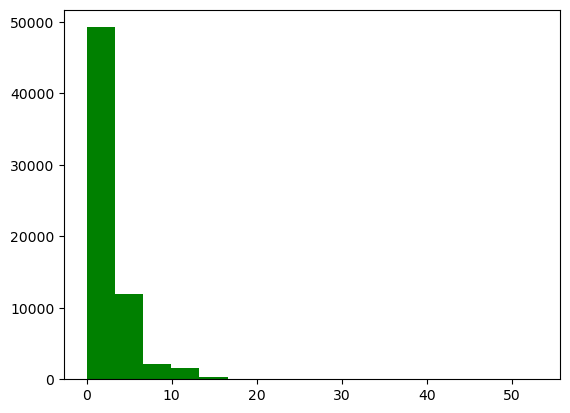

In [13]:
plt.hist(df1.tip_amount.values, 16, histtype='bar', facecolor='g')
plt.show()

In [14]:
print("Minimum amount value is ", np.min(df1.tip_amount.values))
print("Maximum amount value is ", np.max(df1.tip_amount.values))
print("90% of the trips have a tip amount less or equal than ", np.percentile(df1.tip_amount.values, 90))

Minimum amount value is  0.01
Maximum amount value is  53.0
90% of the trips have a tip amount less or equal than  5.15


In [15]:
df1.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4          1  2019-06-01 00:03:25   2019-06-01 00:15:42              1.0   
5          1  2019-06-01 00:28:31   2019-06-01 00:39:23              2.0   
7          1  2019-06-01 00:54:49   2019-06-01 01:02:57              2.0   
9          1  2019-06-01 00:29:12   2019-06-01 01:03:13              1.0   
10         2  2019-06-01 00:01:48   2019-06-01 00:16:06              1.0   

    trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
4            1.70         1.0                  N         113.0         148.0   
5            1.60         1.0                  N          79.0         125.0   
7            1.20         1.0                  N          79.0         249.0   
9            8.60         1.0                  N         186.0         243.0   
10           1.74         1.0                  N         107.0         148.0   

    payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
4            1.0          9.5    3.0      0.5        2.65           0.0   
5            1.0          9.5    3.0      0.5        1.00           0.0   
7            1.0          7.5    3.0      0.5        1.00           0.0   
9            1.0         31.5    3.0      0.5        7.05           0.0   
10           1.0         11.0    0.5      0.5        2.96           0.0   

    improvement_surcharge  congestion_surcharge  
4                     0.3                   2.5  
5                     0.3                   2.5  
7                     0.3                   2.5  
9                     0.3                   2.5  
10                    0.3                   2.5

In [16]:
#data preprocessing

In [17]:
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'])
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])

In [18]:
#pickup & dropoff hour

In [19]:
df1['pickup_hour'] = df1['tpep_pickup_datetime'].dt.hour
df1['dropoff_hour'] = df1['tpep_dropoff_datetime'].dt.hour

In [20]:
#pickup & dropoff day of week

In [21]:
df1['pickup_day'] = df1['tpep_pickup_datetime'].dt.weekday
df1['dropoff_day'] = df1['tpep_dropoff_datetime'].dt.weekday

In [22]:
#computing

In [23]:
df1['trip_time'] = (df1['tpep_dropoff_datetime'] - df1['tpep_pickup_datetime']).astype('timedelta64[m]')

In [24]:
first_n_rows = 1000000
df1 = df1.head(first_n_rows)

In [25]:
#drop pickup & dropoff datetimes

In [26]:
df1 = df1.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1)

In [27]:
#one-hot encoding

In [28]:
get_dummy_col = ["VendorID","RatecodeID","store_and_fwd_flag","PULocationID", "DOLocationID","payment_type", "pickup_hour", "dropoff_hour", "pickup_day", "dropoff_day"]
proc_data = pd.get_dummies(df1, columns = get_dummy_col)

In [29]:
del df1
gc.collect()

3590

In [30]:
#labels

In [31]:
y = proc_data[['tip_amount']].values.astype('float32')

In [32]:
#target variable

In [33]:
proc_data = proc_data.drop(['tip_amount'], axis=1)

In [34]:
#feature matrix

In [35]:
X = proc_data.values

In [36]:
#normalizing

In [37]:
X = normalize(X, axis=1, norm='l1', copy=False)

In [38]:
print('X.shape=', X.shape)
print('y.shape=', y.shape)

X.shape= (65349, 460)
y.shape= (65349, 1)


In [39]:
#train test split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (45744, 460) Y_train.shape= (45744, 1)
X_test.shape= (19605, 460) Y_test.shape= (19605, 1)


In [42]:
#building decision tree with scikit learn

In [43]:
from sklearn.tree import DecisionTreeRegressor

In [44]:
sklearn_dt = DecisionTreeRegressor(max_depth=8, random_state=35)

In [45]:
#training

In [46]:
t0 = time.time()
sklearn_dt.fit(X_train, y_train)
sklearn_time = time.time()-t0
print("[Scikit-Learn] Training time (s):  {0:.5f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  3.42516


In [47]:
#building decision tree with snapML

In [48]:
from snapml import DecisionTreeRegressor

In [49]:
snapml_dt = DecisionTreeRegressor(max_depth=8, random_state=45, n_jobs=4)

In [50]:
#training

In [51]:
t0 = time.time()
snapml_dt.fit(X_train, y_train)
snapml_time = time.time()-t0
print("[Snap ML] Training time (s):  {0:.5f}".format(snapml_time))

[Snap ML] Training time (s):  0.87196


In [52]:
#evaluating

In [53]:
training_speedup = sklearn_time/snapml_time
print('[Decision Tree Regressor] Snap ML vs. Scikit-Learn speedup : {0:.2f}x '.format(training_speedup))

[Decision Tree Regressor] Snap ML vs. Scikit-Learn speedup : 3.93x 


In [54]:
#predictions

In [55]:
sklearn_pred = sklearn_dt.predict(X_test)
snapml_pred = snapml_dt.predict(X_test)

In [56]:
#mean squared error

In [57]:
sklearn_mse = mean_squared_error(y_test, sklearn_pred)
print('[Scikit-Learn] MSE score : {0:.3f}'.format(sklearn_mse))
snapml_mse = mean_squared_error(y_test, snapml_pred)
print('[Snap ML] MSE score : {0:.3f}'.format(snapml_mse))

[Scikit-Learn] MSE score : 1.615
[Snap ML] MSE score : 1.690
